### 1. The Data

In this recitation, we'll apply some of the ideas from Moneyball to data from the National Basketball Association (NBA). Please download the datasets NBA_train.csv and NBA_test.csv, and save them to a location on your computer that you will remember. This data comes from Basketball-Reference.com.

In [1]:
NBA = read.csv('dataset/NBA_train.csv')

In [2]:
str(NBA)

'data.frame':	835 obs. of  20 variables:
 $ SeasonEnd: int  1980 1980 1980 1980 1980 1980 1980 1980 1980 1980 ...
 $ Team     : Factor w/ 37 levels "Atlanta Hawks",..: 1 2 5 6 8 9 10 11 12 13 ...
 $ Playoffs : int  1 1 0 0 0 0 0 1 0 1 ...
 $ W        : int  50 61 30 37 30 16 24 41 37 47 ...
 $ PTS      : int  8573 9303 8813 9360 8878 8933 8493 9084 9119 8860 ...
 $ oppPTS   : int  8334 8664 9035 9332 9240 9609 8853 9070 9176 8603 ...
 $ FG       : int  3261 3617 3362 3811 3462 3643 3527 3599 3639 3582 ...
 $ FGA      : int  7027 7387 6943 8041 7470 7596 7318 7496 7689 7489 ...
 $ X2P      : int  3248 3455 3292 3775 3379 3586 3500 3495 3551 3557 ...
 $ X2PA     : int  6952 6965 6668 7854 7215 7377 7197 7117 7375 7375 ...
 $ X3P      : int  13 162 70 36 83 57 27 104 88 25 ...
 $ X3PA     : int  75 422 275 187 255 219 121 379 314 114 ...
 $ FT       : int  2038 1907 2019 1702 1871 1590 1412 1782 1753 1671 ...
 $ FTA      : int  2645 2449 2592 2205 2539 2149 1914 2326 2333 2250 ...
 $ ORB 

### 2. Playoffs and Wins

In [3]:
table(NBA$W, NBA$Playoffs)

    
      0  1
  11  2  0
  12  2  0
  13  2  0
  14  2  0
  15 10  0
  16  2  0
  17 11  0
  18  5  0
  19 10  0
  20 10  0
  21 12  0
  22 11  0
  23 11  0
  24 18  0
  25 11  0
  26 17  0
  27 10  0
  28 18  0
  29 12  0
  30 19  1
  31 15  1
  32 12  0
  33 17  0
  34 16  0
  35 13  3
  36 17  4
  37 15  4
  38  8  7
  39 10 10
  40  9 13
  41 11 26
  42  8 29
  43  2 18
  44  2 27
  45  3 22
  46  1 15
  47  0 28
  48  1 14
  49  0 17
  50  0 32
  51  0 12
  52  0 20
  53  0 17
  54  0 18
  55  0 24
  56  0 16
  57  0 23
  58  0 13
  59  0 14
  60  0  8
  61  0 10
  62  0 13
  63  0  7
  64  0  3
  65  0  3
  66  0  2
  67  0  4
  69  0  1
  72  0  1

In [4]:
NBA$PTSdiff = NBA$PTS - NBA$oppPTS

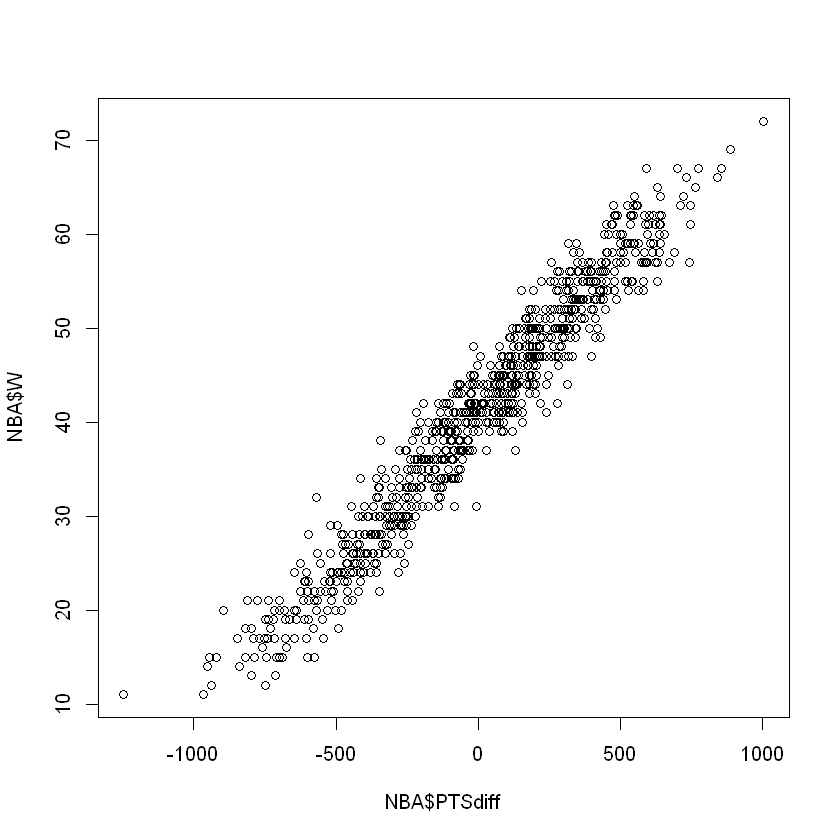

In [5]:
plot(NBA$PTSdiff, NBA$W)

In [6]:
WinsReg = lm(W ~ PTSdiff, data=NBA)

In [7]:
summary(WinsReg)


Call:
lm(formula = W ~ PTSdiff, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7393 -2.1018 -0.0672  2.0265 10.6026 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.100e+01  1.059e-01   387.0   <2e-16 ***
PTSdiff     3.259e-02  2.793e-04   116.7   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.061 on 833 degrees of freedom
Multiple R-squared:  0.9423,	Adjusted R-squared:  0.9423 
F-statistic: 1.361e+04 on 1 and 833 DF,  p-value: < 2.2e-16


### 3. Points Scored

In [8]:
PointsReg = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + STL +BLK, data=NBA)

In [9]:
summary(PointsReg)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + 
    STL + BLK, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-527.40 -119.83    7.83  120.67  564.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.051e+03  2.035e+02 -10.078   <2e-16 ***
X2PA         1.043e+00  2.957e-02  35.274   <2e-16 ***
X3PA         1.259e+00  3.843e-02  32.747   <2e-16 ***
FTA          1.128e+00  3.373e-02  33.440   <2e-16 ***
AST          8.858e-01  4.396e-02  20.150   <2e-16 ***
ORB         -9.554e-01  7.792e-02 -12.261   <2e-16 ***
DRB          3.883e-02  6.157e-02   0.631   0.5285    
TOV         -2.475e-02  6.118e-02  -0.405   0.6859    
STL         -1.992e-01  9.181e-02  -2.169   0.0303 *  
BLK         -5.576e-02  8.782e-02  -0.635   0.5256    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.5 on 825 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8981 
F-sta

In [10]:
PointsReg$residuals

1            2            3            4            5            6 
  38.5722713  142.8720040  -92.8957180   -8.3913473 -258.4705615  171.4608325 
           7            8            9           10           11           12 
 150.4081623  169.3811429   40.7756197  -75.3256614  444.9088743   94.3864704 
          13           14           15           16           17           18 
-205.6809050  113.5969040   64.1993998  -76.5711999  249.4888007   28.0363236 
          19           20           21           22           23           24 
 329.4487991   96.3248342  349.2067913 -284.3765225  196.1611379  198.2493104 
          25           26           27           28           29           30 
 445.4100295   93.8946072 -316.2962802 -166.1909668   -5.8446359  211.2301997 
          31           32           33           34           35           36 
 155.7426615  -23.9248929  -77.9070033  218.9449693  164.1368602 -177.6479438 
          37           38           39           40           41           42 
  66.9205988  162.7892553   23.5961895   93.9839603  185.7015113  -50.2507837 
          43           44           45           46           47           48 
 -90.1181969  139.6866673 -231.1772776  111.2200135  185.9069491  210.6753018 
          49           50           51           52           53           54 
 -47.9420913 -257.8213675  225.7399197   70.4925628  432.6468031  187.4169561 
          55           56           57           58           59           60 
 -34.3947653  112.9305359  334.4717296  222.4169937   17.6755711  165.4512882 
          61           62           63           64           65           66 
 207.9970351   56.8277093  214.6051983  -23.0235142  341.7509536  -48.3807695 
          67           68           69           70           71           72 
 304.9203623  -36.7878762  -31.0357805   61.8847883 -153.0322403  121.7423324 
          73           74           75           76           77           78 
 -61.1581185  -47.9906548 -120.3599484  245.7621368 -264.3876116  161.1110819 
          79           80           81           82           83           84 
  87.3192423  426.2098591   -4.7790973  126.8613801  -97.5009340  329.9773912 
          85           86           87           88           89           90 
 -16.2338716    7.8513505  191.9280982   87.0090318 -142.5397602 -216.2264974 
          91           92           93           94           95           96 
-199.6293933   71.0810742  257.3751407 -227.1203824  -61.4866232   71.3329444 
          97           98           99          100          101          102 
-233.2637272  -34.7860771   84.9503466  108.6553543  -84.8168235  -90.0423121 
         103          104          105          106          107          108 
 341.2144522   52.8507112   47.8978397  181.0574099  160.7203318  237.0174702 
         109          110          111          112          113          114 
 314.9609845   51.9650831  300.2035074 -148.0931149  -13.3592416 -161.6184704 
         115          116          117          118          119          120 
  82.1172789  277.6080699  233.4334153 -225.7299932   69.0259972   37.3407430 
         121          122          123          124          125          126 
  18.2709681  121.8125335  217.9464858  -74.8210467   36.2611001  356.2366230 
         127          128          129          130          131          132 
 439.4127892  111.0266627   72.1377278   -6.1141295  331.6249450 -158.3642350 
         133          134          135          136          137          138 
  94.9048994  151.3242943 -284.7768411 -184.0287416 -103.9972773   54.1758237 
         139          140          141          142          143          144 
 139.3176593  125.3796164  -71.4407602   83.4742245 -131.6383234  -33.5752771 
         145          146          147          148          149          150 
  98.9460909  -59.8760139 -116.6711077 -110.4055752  290.8888709   38.5758792 
         151          152          153          154          

In [12]:
SSE = sum(PointsReg$residuals^2)
SSE

[1] 28394314

In [14]:
#RMSE
RMSE = sqrt(SSE/nrow(NBA))
RMSE

[1] 184.4049

In [15]:
mean(NBA$PTS)

[1] 8370.24

In [16]:
summary(PointsReg)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + TOV + 
    STL + BLK, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-527.40 -119.83    7.83  120.67  564.71 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.051e+03  2.035e+02 -10.078   <2e-16 ***
X2PA         1.043e+00  2.957e-02  35.274   <2e-16 ***
X3PA         1.259e+00  3.843e-02  32.747   <2e-16 ***
FTA          1.128e+00  3.373e-02  33.440   <2e-16 ***
AST          8.858e-01  4.396e-02  20.150   <2e-16 ***
ORB         -9.554e-01  7.792e-02 -12.261   <2e-16 ***
DRB          3.883e-02  6.157e-02   0.631   0.5285    
TOV         -2.475e-02  6.118e-02  -0.405   0.6859    
STL         -1.992e-01  9.181e-02  -2.169   0.0303 *  
BLK         -5.576e-02  8.782e-02  -0.635   0.5256    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.5 on 825 degrees of freedom
Multiple R-squared:  0.8992,	Adjusted R-squared:  0.8981 
F-sta

In [17]:
# Remove TOV
PointsReg2 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + STL + BLK, data=NBA)

In [18]:
summary(PointsReg2)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + DRB + STL + 
    BLK, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-526.79 -121.09    6.37  120.74  565.94 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.077e+03  1.931e+02 -10.755   <2e-16 ***
X2PA         1.044e+00  2.951e-02  35.366   <2e-16 ***
X3PA         1.263e+00  3.703e-02  34.099   <2e-16 ***
FTA          1.125e+00  3.308e-02  34.023   <2e-16 ***
AST          8.861e-01  4.393e-02  20.173   <2e-16 ***
ORB         -9.581e-01  7.758e-02 -12.350   <2e-16 ***
DRB          3.892e-02  6.154e-02   0.632   0.5273    
STL         -2.068e-01  8.984e-02  -2.301   0.0216 *  
BLK         -5.863e-02  8.749e-02  -0.670   0.5029    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.4 on 826 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8982 
F-statistic: 920.4 on 8 and 826 DF,  p-value: < 2.2e-16


In [21]:
# Remove DRB
PointsReg3 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + STL + BLK, data=NBA)
summary(PointsReg3)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + STL + BLK, 
    data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-523.79 -121.64    6.07  120.81  573.64 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.015e+03  1.670e+02 -12.068  < 2e-16 ***
X2PA         1.048e+00  2.852e-02  36.753  < 2e-16 ***
X3PA         1.271e+00  3.475e-02  36.568  < 2e-16 ***
FTA          1.128e+00  3.270e-02  34.506  < 2e-16 ***
AST          8.909e-01  4.326e-02  20.597  < 2e-16 ***
ORB         -9.702e-01  7.519e-02 -12.903  < 2e-16 ***
STL         -2.276e-01  8.356e-02  -2.724  0.00659 ** 
BLK         -3.882e-02  8.165e-02  -0.475  0.63462    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.4 on 827 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8982 
F-statistic:  1053 on 7 and 827 DF,  p-value: < 2.2e-16


In [22]:
# Remove BLK
PointsReg4 = lm(PTS ~ X2PA + X3PA + FTA + AST + ORB + STL, data=NBA)
summary(PointsReg4)


Call:
lm(formula = PTS ~ X2PA + X3PA + FTA + AST + ORB + STL, data = NBA)

Residuals:
    Min      1Q  Median      3Q     Max 
-523.33 -122.02    6.93  120.68  568.26 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.033e+03  1.629e+02 -12.475  < 2e-16 ***
X2PA         1.050e+00  2.829e-02  37.117  < 2e-16 ***
X3PA         1.273e+00  3.441e-02  37.001  < 2e-16 ***
FTA          1.127e+00  3.260e-02  34.581  < 2e-16 ***
AST          8.884e-01  4.292e-02  20.701  < 2e-16 ***
ORB         -9.743e-01  7.465e-02 -13.051  < 2e-16 ***
STL         -2.268e-01  8.350e-02  -2.717  0.00673 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 185.3 on 828 degrees of freedom
Multiple R-squared:  0.8991,	Adjusted R-squared:  0.8983 
F-statistic:  1229 on 6 and 828 DF,  p-value: < 2.2e-16


In [23]:
# SSE
SSE_4 = sum(PointsReg4$residuals^2)
SSE_4
RMSE_4 = sqrt(SSE_4 / nrow(NBA))
RMSE_4

[1] 28421465

[1] 184.493

### 4. Making Predictions

In [24]:
NBA_test = read.csv('./dataset/NBA_test.csv')

In [25]:
PointsPredictions = predict(PointsReg4, newdata=NBA_test)

In [26]:
# Out-of-sample error
SSE = sum((PointsPredictions - NBA_test$PTS)^2)
SSE
SST = sum((mean(NBA$PTS) - NBA_test$PTS)^2)
SST
R_squared = 1 - SSE / SST
R_squared

[1] 1079739

[1] 5765192

[1] 0.8127142

In [27]:
RMSE = sqrt(SSE / nrow(NBA_test))
RMSE

[1] 196.3723